In [97]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
model = VGG16(weights='imagenet', include_top=True)

In [99]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen.flow_from_directory(r'C:\Users\Bartosz\Desktop\archive\PetImagesfix\\', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 322 images belonging to 2 classes.


In [100]:
from keras.layers import Input, Dense
from keras.models import Model
input_shape = (224,224, 3)
num_classes = 2 
inputs = Input(shape=(input_shape))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [102]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.fit(train_generator, steps_per_epoch=len(train_generator),epochs=5)

Epoch 1/5
11/11 [==============================] - 9s 710ms/step - loss: 1.1304 - accuracy: 0.5342
Epoch 2/5
11/11 [==============================] - 8s 733ms/step - loss: 0.6712 - accuracy: 0.5807
Epoch 3/5
11/11 [==============================] - 8s 713ms/step - loss: 0.6382 - accuracy: 0.6118
Epoch 4/5
11/11 [==============================] - 8s 728ms/step - loss: 0.5713 - accuracy: 0.6894
Epoch 5/5
11/11 [==============================] - 8s 716ms/step - loss: 0.5741 - accuracy: 0.6584


In [ ]:
#import os
#from PIL import Image
#input_folder1 = r'C:\Users\Bartosz\Desktop\archive\PetImages\Dog'
#output_folder1 = r'C:\Users\Bartosz\Desktop\archive\nowypies\\'
#for filename in os.listdir(input_folder1):
#    if filename.endswith(".png"):
#        image = Image.open(os.path.join(input_folder1), filename)
#        
#        rgb_image = image.convert("RGB")
#        
#        output_path = os.path.join(output_folder1, filename.replace(".png",".jpg"))
#        rgb_image.save(output_path)
#print("przetwarzanie zakonczone")

In [ ]:
#import os
#from PIL import Image
#input_folder1 = r'C:\Users\Bartosz\Desktop\archive\PetImages\Cat'
#output_folder1 = r'C:\Users\Bartosz\Desktop\archive\nowypies\\'
#
#desired_size = (224, 224)
#
#if not os.path.exists(output_folder1):
#    os.makedirs(output_folder1)
#    
#for filename in os.listdir(input_folder):
#    if filename.endswith(".jpg"):
#        image = Image.open(os.path.join(input_folder1,filename))
#        resized_image = image.resize(desired_size)
#        resized_image.save(os.path.join(output_folder1, filename))
#print("przetwarzanie zakonczone")

In [ ]:
#import os
#from PIL import Image
#input_folder1 = r'C:\Users\Bartosz\Desktop\archive\PetImages\Dog'
#output_folder1 = r'C:\Users\Bartosz\Desktop\archive\nowypies\\'
#
#desired_size = (224, 224)
#
#if not os.path.exists(output_folder1):
#    os.makedirs(output_folder1)
#    
#for filename in os.listdir(input_folder1):
#    if filename.endswith(".jpg"):
#        image = Image.open(os.path.join(input_folder1,filename))
#        resized_image = image.resize(desired_size)
#        resized_image.save(os.path.join(output_folder1, filename))
#print("przetwarzanie zakonczone")

In [104]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

In [105]:
from PIL import Image
import numpy as np

img = Image.open(r'C://Users//Bartosz//doggo//dg2.jpg')
img = img.resize((224,224))

img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

result = model.predict(img_array)

predicted_class = np.argmax(result)

class_labels = {0: 'cat', 1: 'dog'}
predicted_label = class_labels[predicted_class]

print(f"model przewiduje ze to jest: {predicted_label}")

1/1 [==============================] - 0s 69ms/step
model przewiduje ze to jest: dog


In [106]:
import os
path_to_doggo = r'C:\Users\Bartosz\doggo\dg2.jpg'
if os.path.exists(path_to_doggo):
    img = Image.open(path_to_doggo)
else:
    print("nie znaleziono pliku")

In [107]:
from PIL import Image
import numpy as np

img = Image.open(r'C://Users//Bartosz//catto//ct4.jpg')
img = img.resize((224,224))

img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

result = model.predict(img_array)

predicted_class = np.argmax(result)

class_labels = {0: 'cat', 1: 'dog'}
predicted_label = class_labels[predicted_class]

print(f"model przewiduje ze to jest: {predicted_label}")

1/1 [==============================] - 0s 25ms/step
model przewiduje ze to jest: dog


11/11 [==============================] - 2s 147ms/step


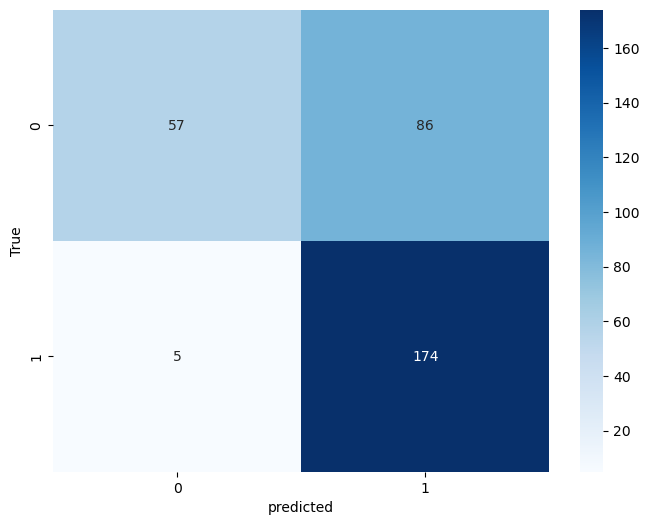

In [108]:
### macierz pomylek 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
y_true = []

for i in range(len(train_generator)):
    x_train, labels_train  = train_generator[i]
    y_true.extend(np.argmax(labels_train, axis=1))
    
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

Found 322 images belonging to 2 classes.
11/11 [==============================] - 2s 136ms/step


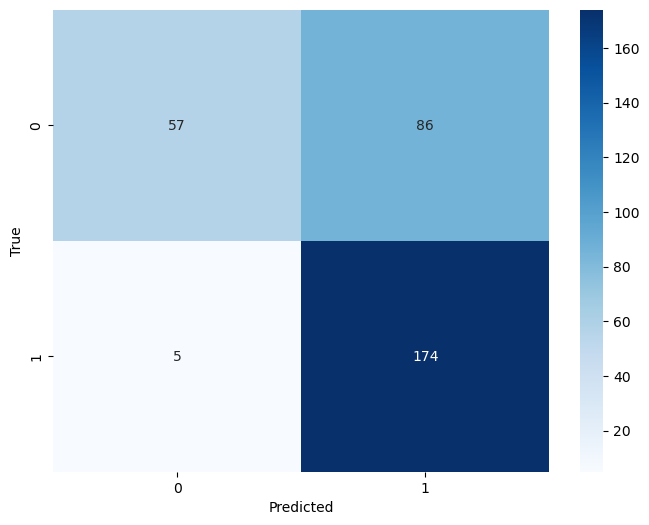

In [109]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\Bartosz\Desktop\Archive\test\\',
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical',
    shuffle=False
)


num_test_samples = len(test_generator.filenames)
num_classes = len(test_generator.class_indices)
y_pred = model.predict(test_generator, steps=np.ceil(num_test_samples/30))



#test_images, test_labels = next(train_generator)

#y_pred = model.predict(test_images)
#y_pred = np.argmax(y_pred, axis=1)

y_true = test_generator.classes
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()